In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report,accuracy_score
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED = 42
LABELS = ['Normal','Fraud']

In [46]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory Data Analysis

In [48]:
data.isna().values.any()

False

Text(0, 0.5, 'Frequency')

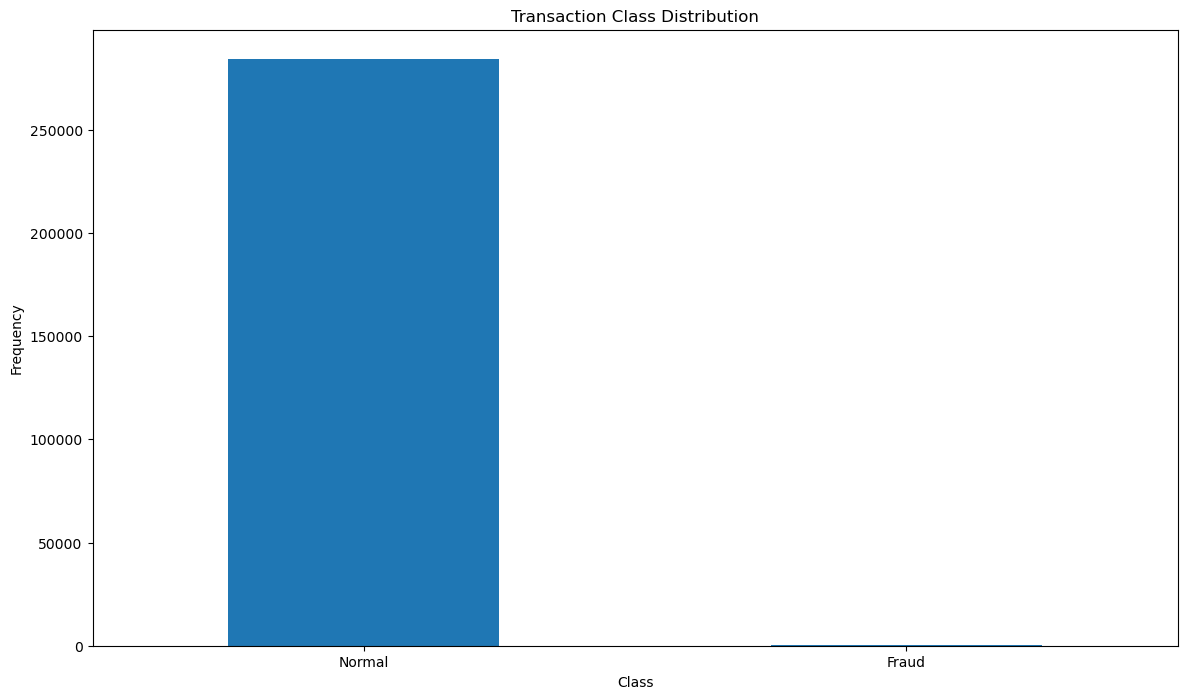

In [49]:
count_classes=data['Class'].value_counts()
count_classes.plot(kind='bar',rot=0)
plt.title('Transaction Class Distribution')
plt.xticks(range(2),LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

In [50]:
# Get the Fraud and Normal dataset
normal=data[data['Class']==0]
fraud=data[data['Class']==1]

In [51]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [52]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [53]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

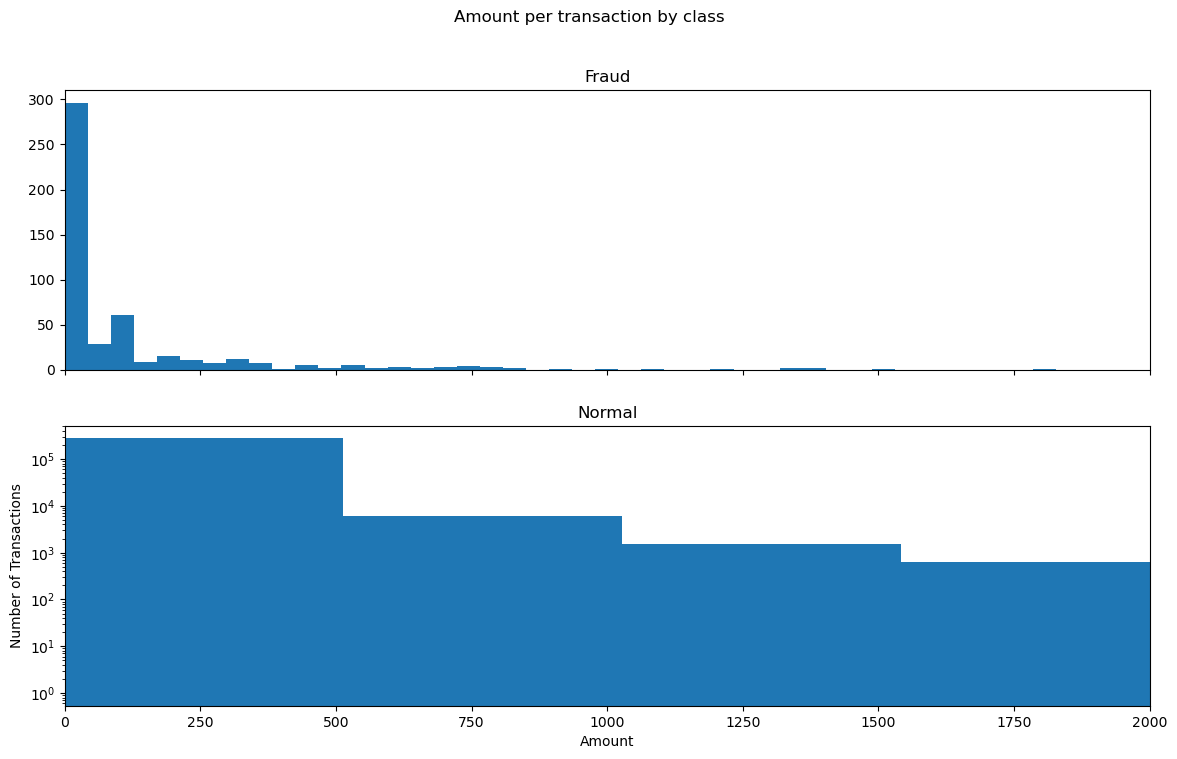

In [54]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0,2000))
plt.yscale('log')
plt.show();

In [55]:
# Taking some sample of the data

data1=data.sample(frac=0.1,random_state=1)
data1.shape

(28481, 31)

In [56]:
# Determine the number of fraud and valid transactons in dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction=len(Fraud)/float(len(Valid))

In [57]:
print(outlier_fraction)
print(f'Fraud Cases : {len(Fraud)}')
print(f'Valid Cases : {len(Valid)}')

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


<AxesSubplot:>

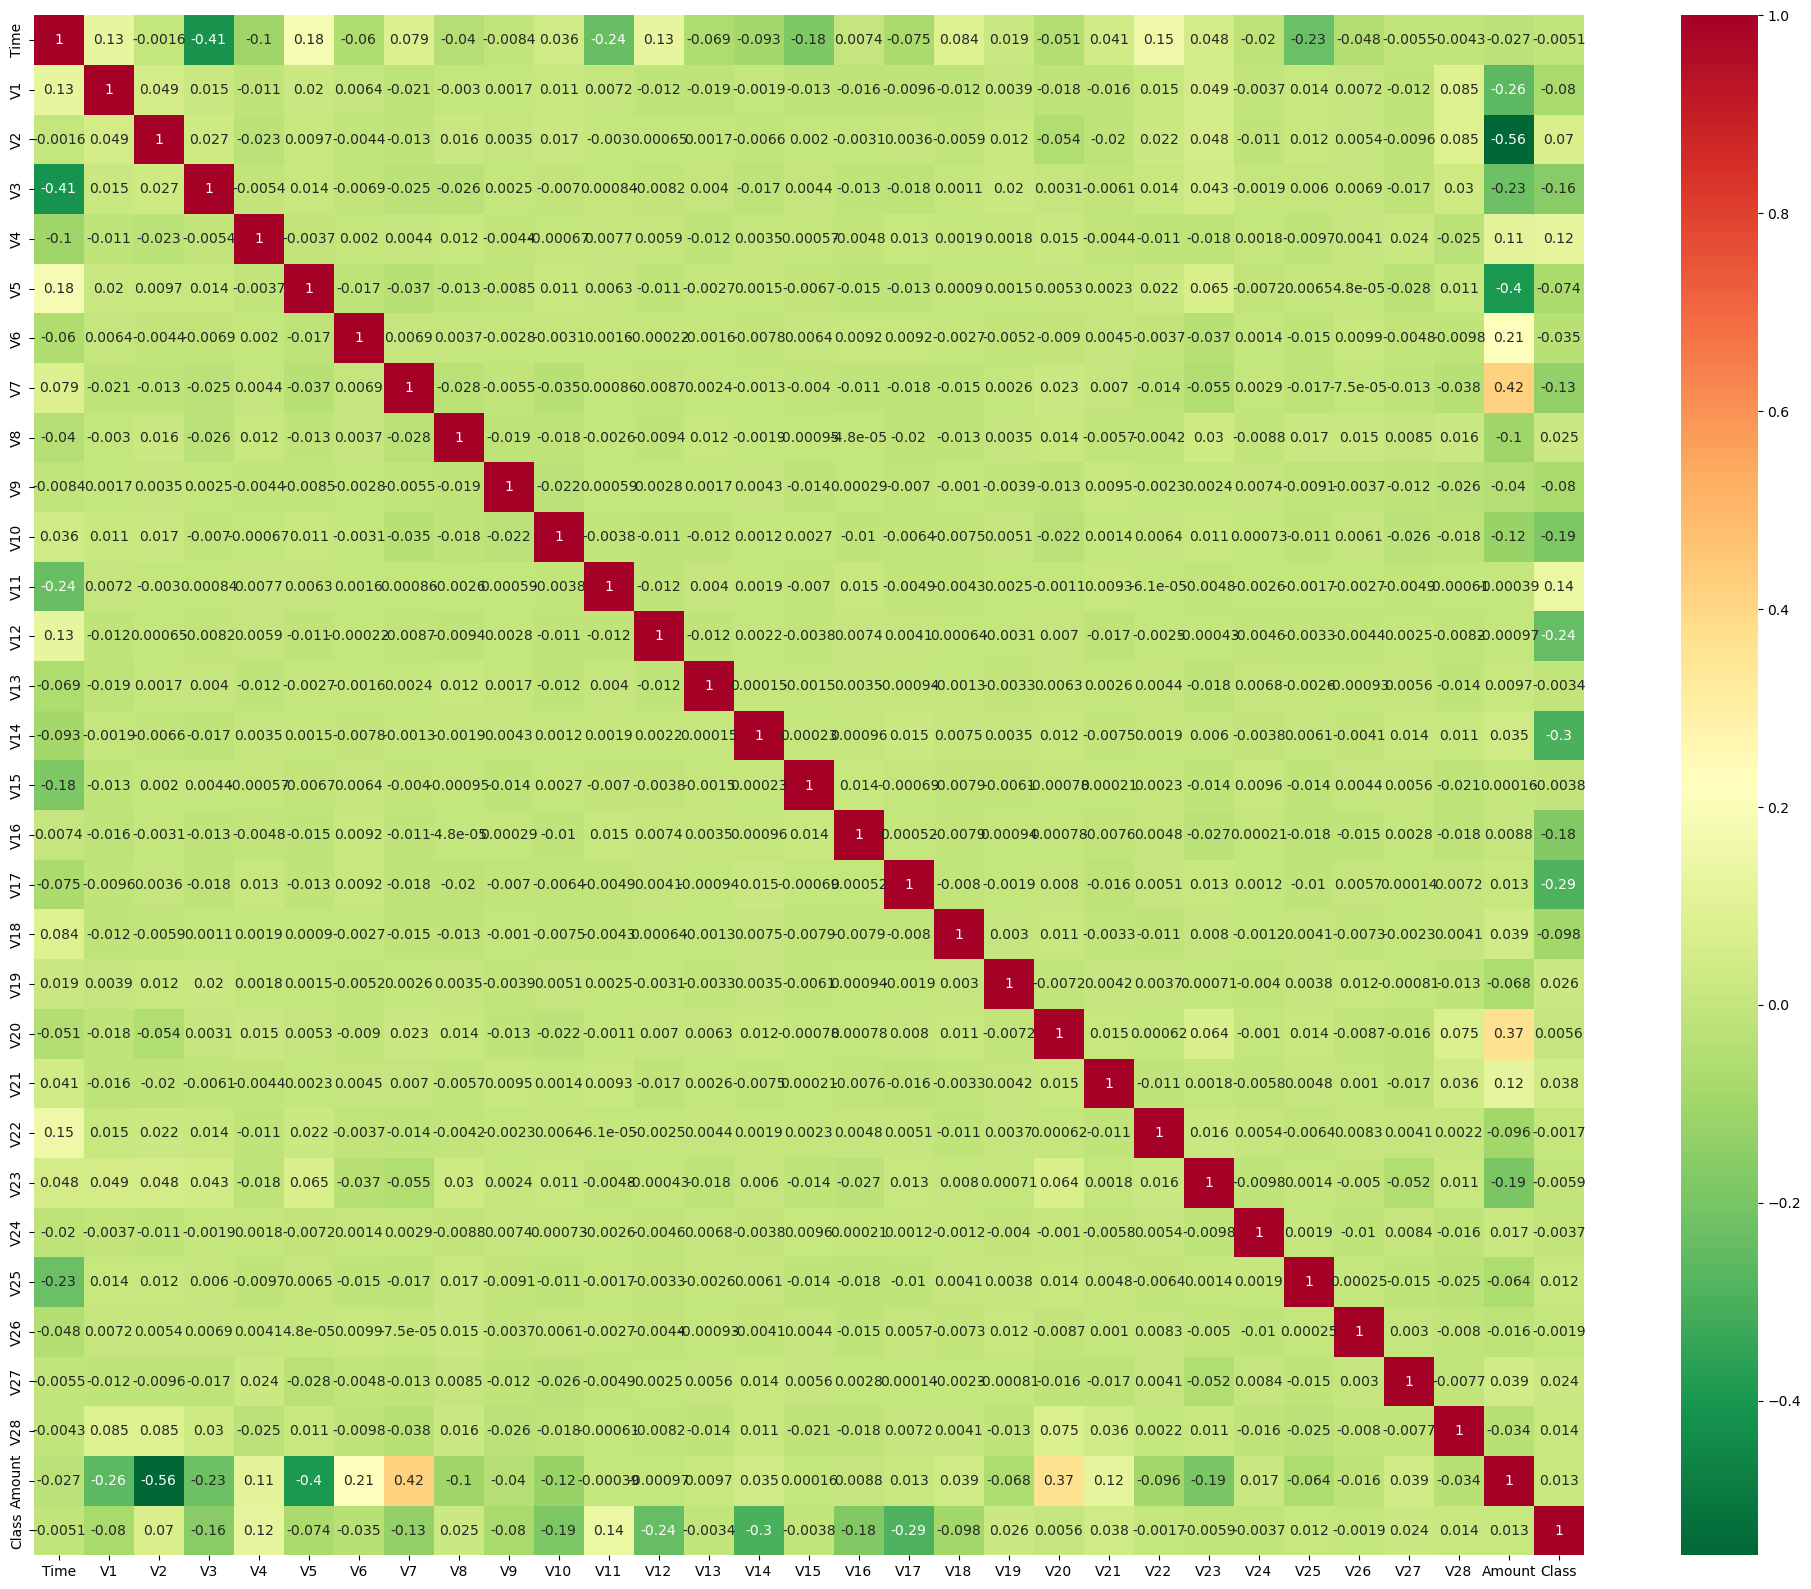

In [58]:
# Correlation
corrmat=data1.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn_r")

In [61]:
columns=data1.columns.tolist()
columns=[c for c in columns if c not in ['Class']]
target='Class'
state=np.random.RandomState(42)
X=data1[columns]
Y=data1[target]
X_outliers=state.uniform(low=0,high=1,size=(X.shape[0],X.shape[1]))
print(X.shape)
print(Y.shape)


(28481, 30)
(28481,)


In [63]:
classifiers={"Isolation Forest":IsolationForest(n_estimators=100,max_samples=len(X),contamination=outlier_fraction,random_state=state,verbose=0),
             "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,contamination=outlier_fraction),
             "Support Vector Machine":OneClassSVM(kernel='rbf',degree=3,gamma=0.1,nu=0.05,max_iter=-1)}

In [64]:
n_outliers = len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred=clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction=clf.decision_function(X)
        y_pred=clf.predict(X)

    #Reshape the prediction values for valid transaction,1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors =(y_pred !=Y).sum()
    #Run Classification Metrics
    print("{}:{}".format(clf_name,n_errors))
    print(f"Accuracy Score :{accuracy_score(Y,y_pred)}")
    print(f"Classification Report :{classification_report(Y,y_pred)}")

e:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest:73
Accuracy Score :0.9974368877497279
Classification Report :              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:97
Accuracy Score :0.9965942207085425
Classification Report :              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine:8516
Accuracy Score :0.7009936448860644
Classification Report :              precision    recall  f1-score   support

           0       1.00      0.70      0.82  